# Multi linear regression 

We want to compute a multi linear regression between the parameter values for each perturbation and the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis). 

#### Emulator equation : Y = f(X) 
* Y is a 1x50 matrix containing the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis).
* X is a 30X50 matrix containing the 30 values of the physical parameters, for the 50 perturbations.

## Import modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

## Import functions

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions_emulation
from Fonctions_emulation import Lasso_tunage
from Fonctions_emulation import Lasso_model
from Fonctions_emulation import plot_model_skill
from Fonctions_emulation import plot_model_skill_lines
from Fonctions_emulation import Lasso_pred
from Fonctions_emulation import MultiLinReg_model
from Fonctions_emulation import MultiLinReg_pred

## Lasso Model (multi linear regression, Cross-Validation)

## Tunage du modèle

In [3]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_pr.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

Computing regularization path using the coordinate descent lasso...


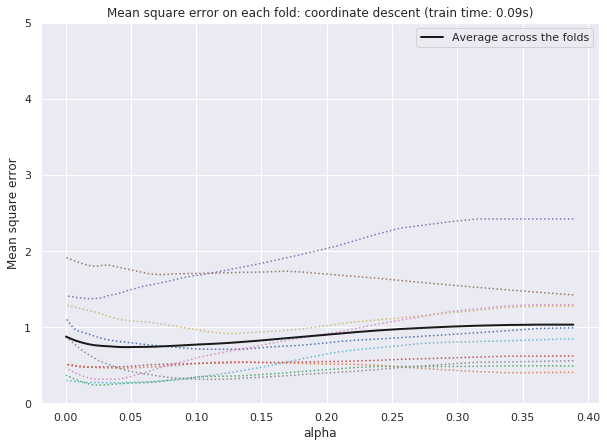

Computing regularization path using the coordinate descent lasso...


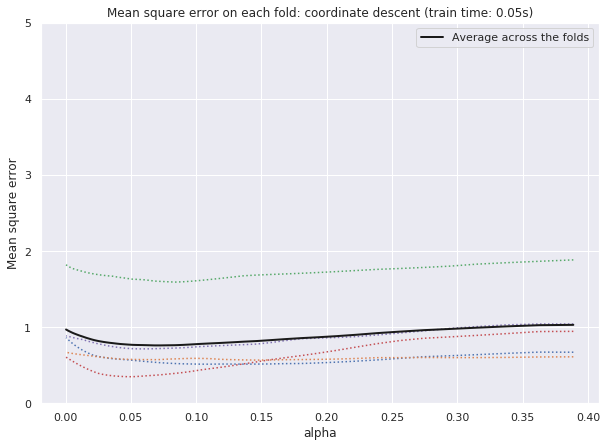

In [4]:
Lasso_tunage(X,y)

## Création du modèle

In [5]:
alpha = 0.05

nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']




DFYeq_lasso = Lasso_model(X,y,alpha,nb_p_list)
DFYeq_lasso

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 0.00021646077741002527
Coefficients: 
 [ 0.01219043 -0.03269134 -0.20272694  0.06961627 -0.         -0.35331989
 -0.          0.0396749   0.20214387  0.13773341  0.         -0.
  0.05056813  0.03455886 -0.         -0.         -0.07369027  0.
 -0.13528597  0.         -0.05080376  0.01148108  0.          0.3096854
  0.         -0.07035356 -0.          0.07690299  0.         -0.01540721]
Score: 
 0.5373036394358935


,y_true,y_eq,members,members_0
0,0.704543,-0.408830,p311,0
1,0.536533,0.315737,p312,1
2,0.630465,0.892808,p314,2
3,0.771956,-0.273141,p316,3
4,1.908538,0.867382,p317,4
...,...,...,...,...
97,0.066118,0.285443,p465,97
98,-0.785519,-0.849981,p467,98
99,0.032738,0.030276,p469,99
100,1.254922,0.963620,p470,100


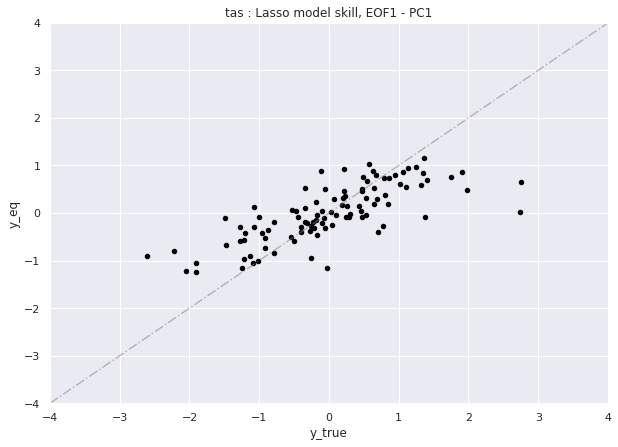

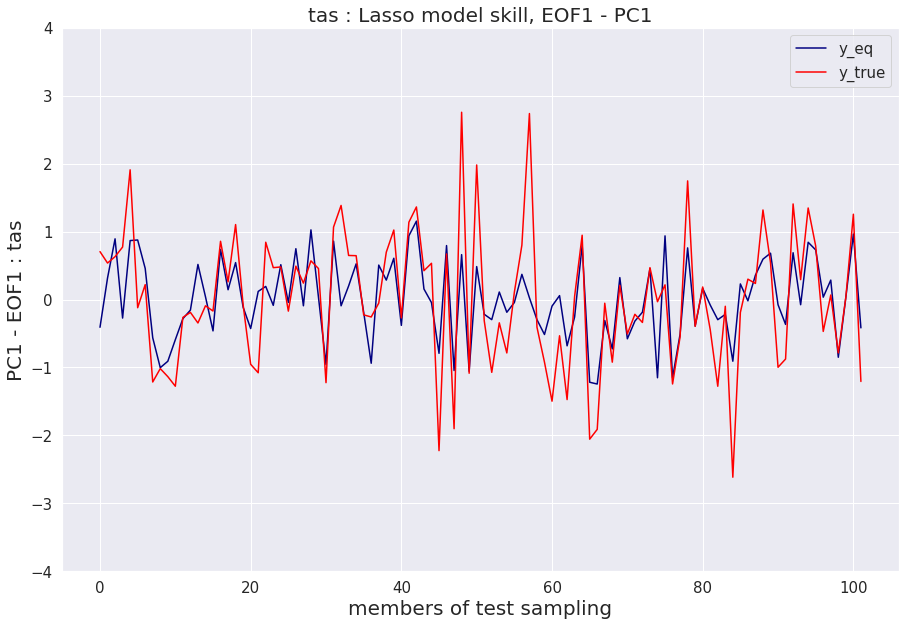

In [6]:
df = DFYeq_lasso
title = 'tas : Lasso model skill, EOF1 - PC1'
xmin = -4
xmax = 4
ymin = -4
ymax = 4
name = 'Lasso_tas_skill_pc1.png'

plot_model_skill(df, title, xmin, xmax, ymin, ymax, name)

xlabel = 'members of test sampling'
ylabel = 'PC1 - EOF1 : tas'

plot_model_skill_lines(df, title, xlabel, ylabel, ymin, ymax)

## LASSO model : prediction

In [7]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS100000_param_standard.npy")

DFYpred_lasso = Lasso_pred(LHS, X, y, alpha)
DFYpred_lasso

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 0.00021646077741002527
Coefficients: 
 [ 0.01219043 -0.03269134 -0.20272694  0.06961627 -0.         -0.35331989
 -0.          0.0396749   0.20214387  0.13773341  0.         -0.
  0.05056813  0.03455886 -0.         -0.         -0.07369027  0.
 -0.13528597  0.         -0.05080376  0.01148108  0.          0.3096854
  0.         -0.07035356 -0.          0.07690299  0.         -0.01540721]
Score: 
 0.5373036394358935


,y_pred,members
0,0.121823,102.0
1,0.302732,103.0
2,0.325676,104.0
3,0.597045,105.0
4,-0.598540,106.0
...,...,...
99995,-0.694969,100097.0
99996,0.953653,100098.0
99997,0.370891,100099.0
99998,1.398043,100100.0


## Multi Linear Regression model PC1 - EOF1

In [8]:
DFYeq = MultiLinReg_model(X,y,param_names, nb_p_list)
DFYeq

Intercept: 
 0.00021646077741005118
Coefficients: 
 [ 0.06677524 -0.10580028 -0.25316467  0.07239096 -0.03673837 -0.42887744
 -0.03641515  0.11269384  0.25667932  0.1710069   0.03989154  0.00829093
  0.09692771  0.12202349 -0.01314534 -0.02755243 -0.1243247  -0.02813153
 -0.2233692   0.10236953 -0.10124303  0.1112978   0.00380964  0.37026623
  0.06676018 -0.12499396  0.00527336  0.13504188  0.0586661  -0.06741051]
Score: 
 0.6004652904476939


,y_true,y_eq,members,members_0
0,0.704543,-0.561288,p311,0
1,0.536533,0.355691,p312,1
2,0.630465,1.170858,p314,2
3,0.771956,-0.116146,p316,3
4,1.908538,1.247458,p317,4
...,...,...,...,...
97,0.066118,0.321770,p465,97
98,-0.785519,-1.127879,p467,98
99,0.032738,-0.324298,p469,99
100,1.254922,1.307354,p470,100


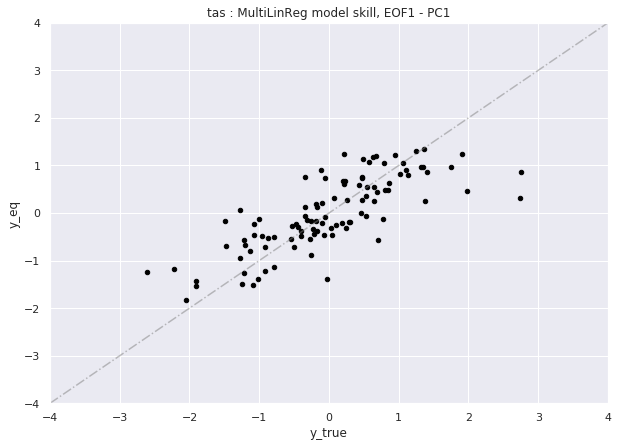

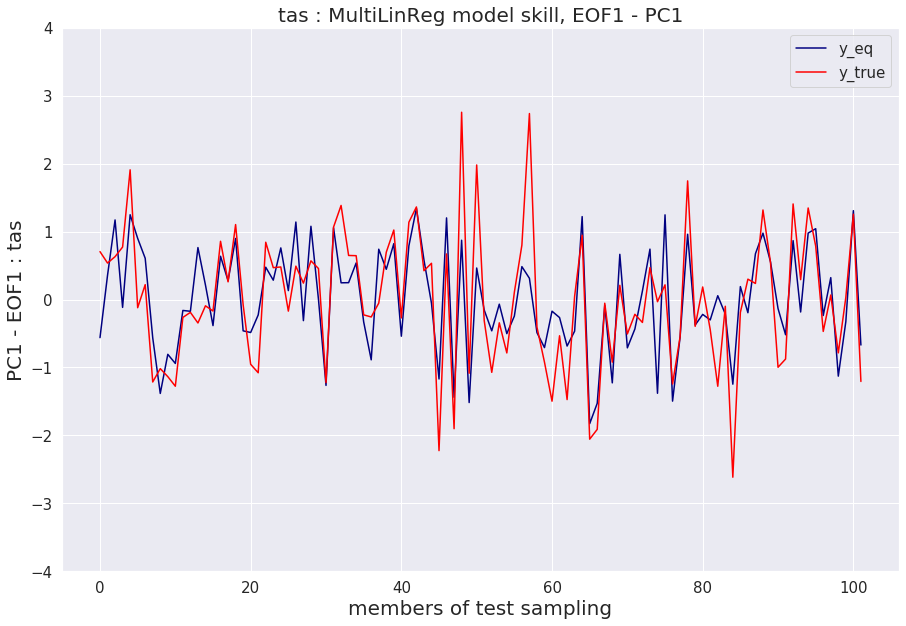

In [9]:
df = DFYeq
title = 'tas : MultiLinReg model skill, EOF1 - PC1'
xmin = -4
xmax = 4
ymin = -4
ymax = 4
name = 'MultiLinReg_tas_skill_pc1.png'

plot_model_skill(df, title, xmin, xmax, ymin, ymax, name)

xlabel = 'members of test sampling'
ylabel = 'PC1 - EOF1 : tas'

plot_model_skill_lines(df, title, xlabel, ylabel, ymin, ymax)

## Multi Linear Regression model : prediction

In [10]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS100000_param_standard.npy")

DFYpred = MultiLinReg_pred(LHS,X,y, param_names)
DFYpred

,y_pred,members
0,0.029989,102.0
1,-0.020168,103.0
2,0.526450,104.0
3,0.829454,105.0
4,-0.879496,106.0
...,...,...
99995,-0.608099,100097.0
99996,1.303263,100098.0
99997,0.134204,100099.0
99998,1.480660,100100.0


# Plotting Part

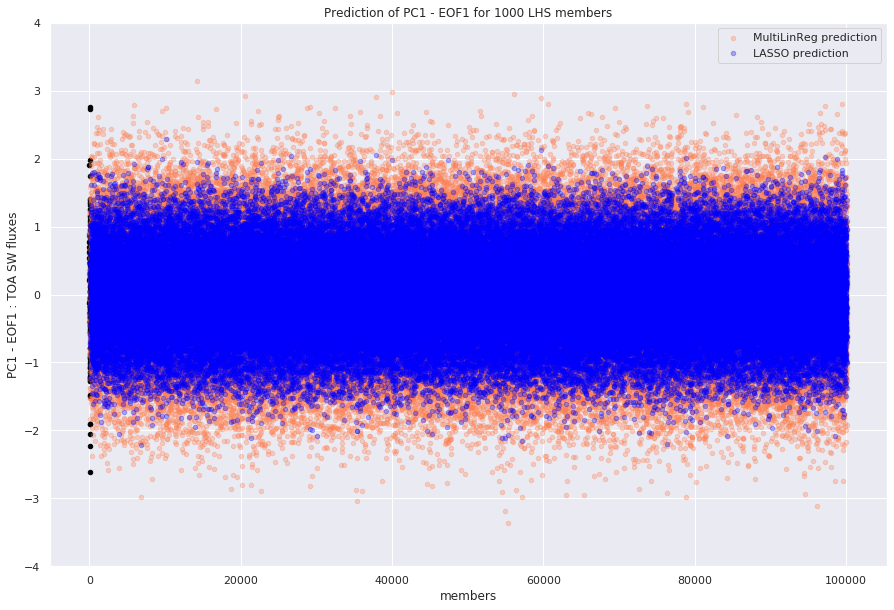

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
title = 'Prediction of PC1 - EOF1 for 1000 LHS members'

# y_true validation
DFYeq.plot(kind='scatter', x='members_0', y='y_eq', color='coral', alpha = 0.3,
                     style='.', legend=False, ax = ax)
DFYeq_lasso.plot(kind='scatter', x='members_0',legend=False, y='y_eq', color='blue', alpha = 0.3,
                     style='.', ax = ax)
#DFYeq_NN.plot(kind='scatter', x='members',legend=False, y='y_eq', color='green', alpha = 0.3,
#                     style='.', ax = ax)

# (y_true) : PC1 - EOF1 dans l'ensemble
DFYeq.plot(kind='scatter', x='members_0', y='y_true', color='black', 
                     style='.', ax = ax)

# LHS Prediction
DFYpred.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='coral', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_lasso.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='blue', 
             alpha=0.3,linewidth=1.0,ax=ax)
#DFYpred_NN.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='green', 
#             alpha=0.3,linewidth=1.0,ax=ax)


plt.xlabel('members')
plt.ylabel('PC1 - EOF1 : TOA SW fluxes')
plt.legend(['MultiLinReg prediction', 'LASSO prediction'])#, 'NN prediction','PPE values'])
plt.title(title)
#plt.xlim(-4,200)
plt.ylim(-4,4)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [12]:
MultiLinReg_validation = DFYeq['y_eq'].values
MultiLinReg_prediction = DFYpred['y_pred'].values

LASSO_validation = DFYeq_lasso['y_eq'].values
LASSO_prediction = DFYpred_lasso['y_pred'].values

#NN_validation = DFYeq_NN['y_eq'].values
#NN_prediction = DFYpred_NN['y_pred'].values

# Save the predictionc in numpy arrays : 
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof3_pr.npy', 
        MultiLinReg_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof3_pr.npy', 
        MultiLinReg_prediction)

np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof3_pr.npy', 
        LASSO_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof3_pr.npy', 
        LASSO_prediction)

#np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_eof1_tas.npy', 
#        NN_validation)
#np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_eof1_tas.npy', 
#        NN_prediction)